In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df = pd.read_csv('values.csv')
target = pd.read_csv('labels.csv')

In [4]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
target.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
patient_id                              180 non-null object
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 19.8+ KB


In [7]:
df = pd.merge(df,target)
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [8]:
df = df.rename(columns = {'slope_of_peak_exercise_st_segment':'slope','resting_blood_pressure':'restbp','chest_pain_type':'cp','fasting_blood_sugar_gt_120_mg_per_dl':'fbs','resting_ekg_results':'restecg','serum_cholesterol_mg_per_dl':'chol','oldpeak_eq_st_depression':'oldpeak','max_heart_rate_achieved':'maxheartrate','heart_disease_present':'target','exercise_induced_angina':'exang','heart_disease_present':'target'})
for columns in df.columns:
    print(columns)

patient_id
slope
thal
restbp
cp
num_major_vessels
fbs
restecg
chol
oldpeak
sex
age
maxheartrate
exang
target


In [9]:
df.describe()

,slope,restbp,cp,num_major_vessels,fbs,restecg,chol,oldpeak,sex,age,maxheartrate,exang,target
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [10]:
df.shape

(180, 15)

In [11]:
df.isnull().sum()

patient_id           0
slope                0
thal                 0
restbp               0
cp                   0
num_major_vessels    0
fbs                  0
restecg              0
chol                 0
oldpeak              0
sex                  0
age                  0
maxheartrate         0
exang                0
target               0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    180
dtype: int64

In [13]:
df.dtypes

patient_id            object
slope                  int64
thal                  object
restbp                 int64
cp                     int64
num_major_vessels      int64
fbs                    int64
restecg                int64
chol                   int64
oldpeak              float64
sex                    int64
age                    int64
maxheartrate           int64
exang                  int64
target                 int64
dtype: object

## Exploratory Data Analysis

### Analysing the target feature

0    100
1     80
Name: target, dtype: int64


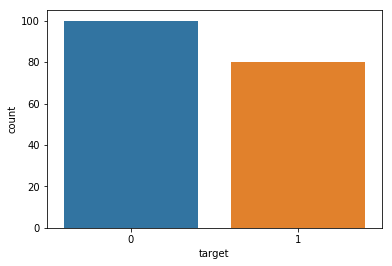

In [14]:
y = df["target"]

sns.countplot(y)


target_temp = df.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/180,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/180,2)))

Percentage of patience without heart problems: 55.56
Percentage of patience with heart problems: 44.44


The dataset is balanced.

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [16]:
df['sex'].value_counts()

1    124
0     56
Name: sex, dtype: int64

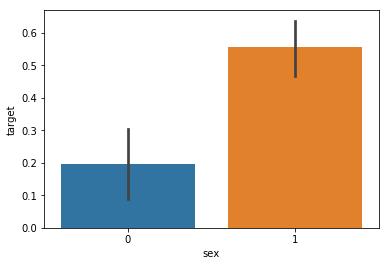

In [17]:
sns.barplot(df["sex"],y)

### Analysing the 'Chest Pain Type' feature

Text(0, 0.5, 'Count')

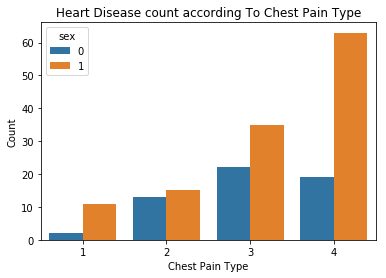

In [18]:
ax = sns.countplot(x = "cp",hue = "sex", data = df)
plt.title('Heart Disease count according To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')

 From this it can be infered that type 4 chest pain is more common in men(male) and type 3 in case of women(female) 

### Analysing the FBS feature

The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

In [19]:
df['fbs'].describe()

count    180.000000
mean       0.161111
std        0.368659
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
df['fbs'].unique()

array([0, 1], dtype=int64)

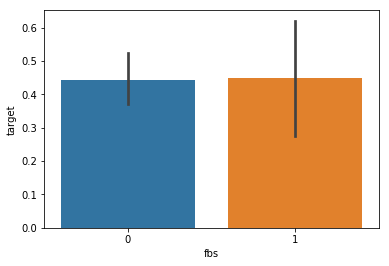

In [21]:
sns.barplot(df["fbs"],y)

Nothing significant can be infered. 

### Analysing the restecg feature

 Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

In [22]:
df['restecg'].unique()

array([2, 0, 1], dtype=int64)

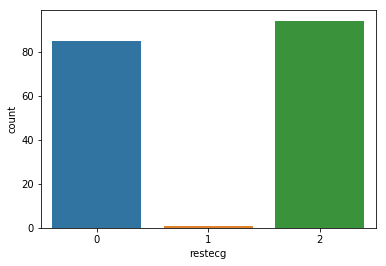

In [23]:
sns.countplot(df['restecg'])

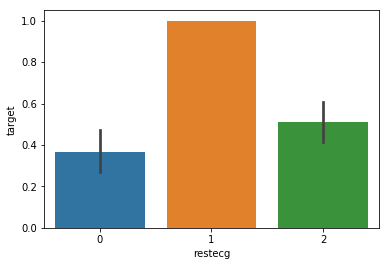

In [24]:
sns.barplot(df['restecg'],y)

Not very significant, however, type 2(showing probable or definite left ventricular hypertrophy by Estes' criteria) are more prone to heart disease. Data for type 1 is insufficient to arrive at a conclusion.

### Analysing the Slope feature

Value 1: upsloping, Value 2: flat, Value 3: downsloping

In [25]:
df['slope'].unique()

array([1, 2, 3], dtype=int64)

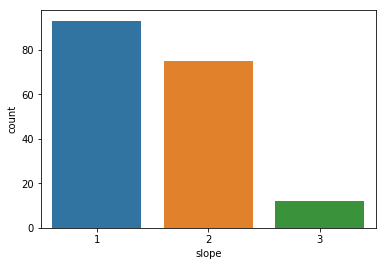

In [26]:
sns.countplot(df['slope'])

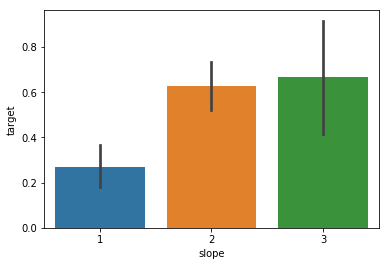

In [27]:
sns.barplot(df['slope'],y)

We observe that slope 2 and slope 3 causes more heart problems than slope 1. 

### Analysing the number of major vessels feature

The number of major vessels (0-3)

In [28]:
df['num_major_vessels'].unique()

array([0, 3, 2, 1], dtype=int64)

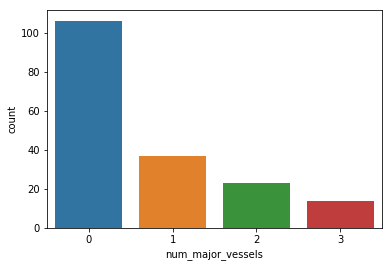

In [29]:
sns.countplot(df["num_major_vessels"])

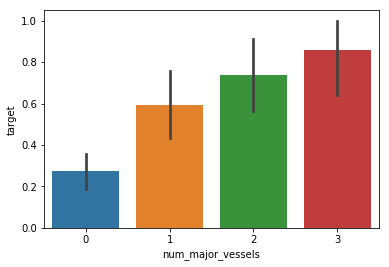

In [30]:
sns.barplot(df['num_major_vessels'],y)

Number of major vessels varies linearly with heart problem. 

### Analysing the 'thal' feature

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

In [31]:
df['thal'].unique()

array(['normal', 'reversible_defect', 'fixed_defect'], dtype=object)

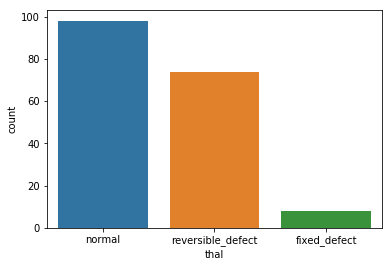

In [32]:
sns.countplot(df['thal'])

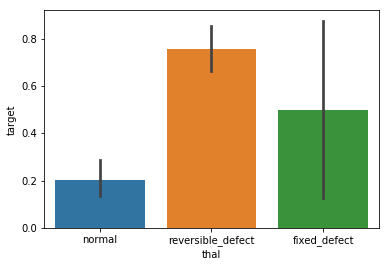

In [33]:
sns.barplot(df['thal'],y)

As expected reversible defect thal and fixed defect thal are more susceptible to heart problems. 

### Analysing the 'exang' feature

In [34]:
df['exang'].unique()

array([0, 1], dtype=int64)

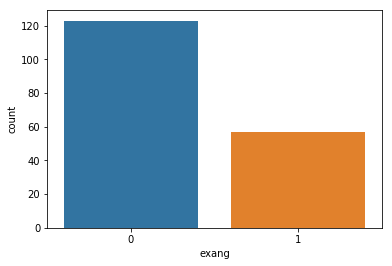

In [35]:
sns.countplot(df['exang'])

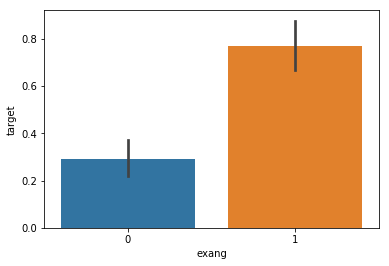

In [36]:
sns.barplot(df['exang'],y)

It is evident that people with exercise induced angina are susceptible to heart problems. 

### Age distribution

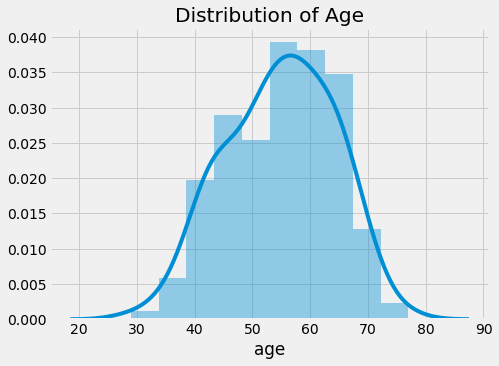

In [37]:
import warnings 
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (7,5)
sns.distplot(df['age'])
plt.title('Distribution of Age')
plt.show()


### Analysing the 'restbp' feature 

The person's resting blood pressure (mm Hg on admission to the hospital) 

In [38]:
df['restbp'].describe()

count    180.000000
mean     131.311111
std       17.010443
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: restbp, dtype: float64

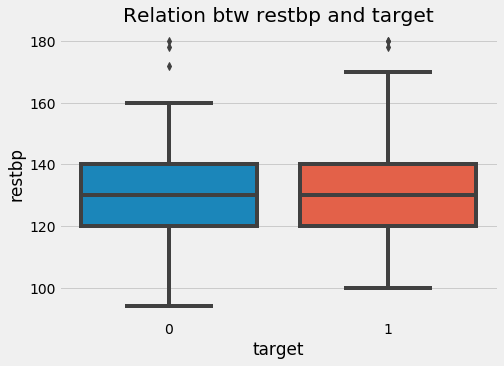

In [39]:
sns.boxplot(df['target'],df['restbp'])
plt.title('Relation btw restbp and target')
plt.show()

The above bivariate plot between restbp(the resting blood pressure of patient) and the target(whether the person is suffering from heart disease or not). The plot clearly suggest that the patients who are more likely to have heart disease have slightly higher blood pressure than the patients without heart disease.  

### Analysing the 'chol' feature

In [40]:
df['chol'].describe()

count    180.000000
mean     249.211111
std       52.717969
min      126.000000
25%      213.750000
50%      245.500000
75%      281.250000
max      564.000000
Name: chol, dtype: float64

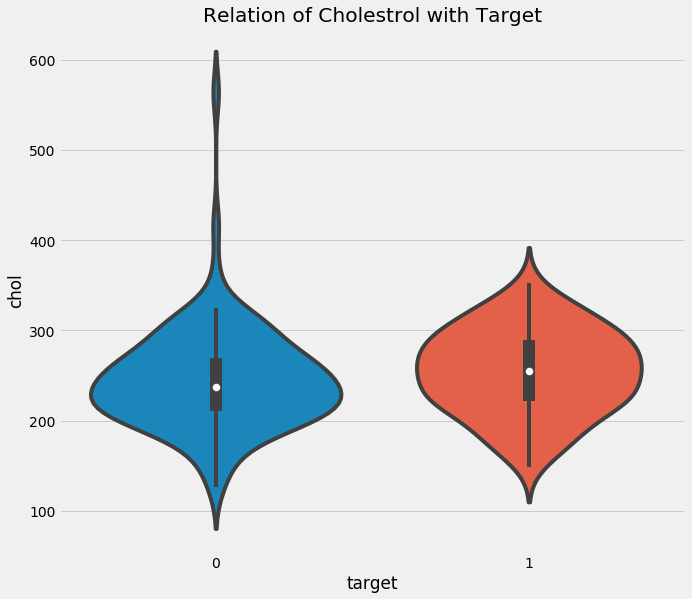

In [41]:
plt.rcParams['figure.figsize'] = (10, 9)
sns.violinplot(df['target'], df['chol'])
plt.title('Relation of Cholestrol with Target')
plt.show()

The above violin plot shows the relation of cholestrol on the target variable. The data shows that people with heart disease have slightly higher cholestrol levels compared to the ones without heart disease. However, high cholestrol doesn't always mean heart disease is present.  

### Analysing the 'maxheartrate' feature

In [42]:
df['maxheartrate'].describe()

count    180.000000
mean     149.483333
std       22.063513
min       96.000000
25%      132.000000
50%      152.000000
75%      166.250000
max      202.000000
Name: maxheartrate, dtype: float64

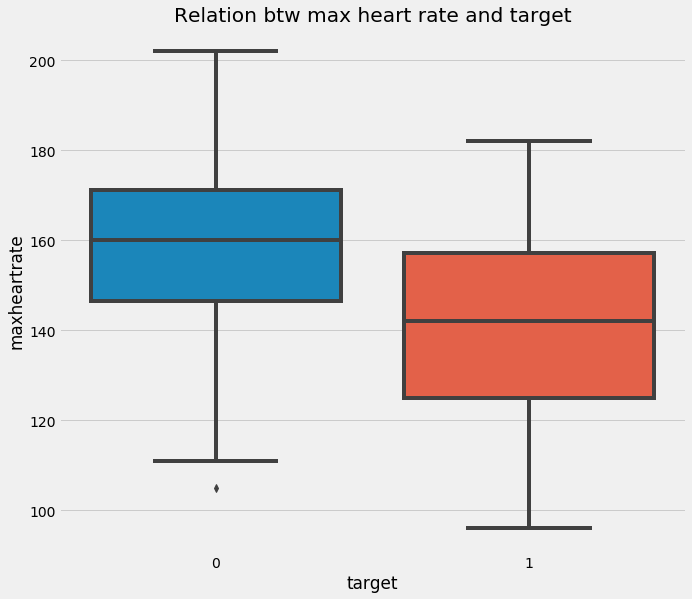

In [43]:
sns.boxplot(df['target'],df['maxheartrate'])
plt.title('Relation btw max heart rate and target')
plt.show()

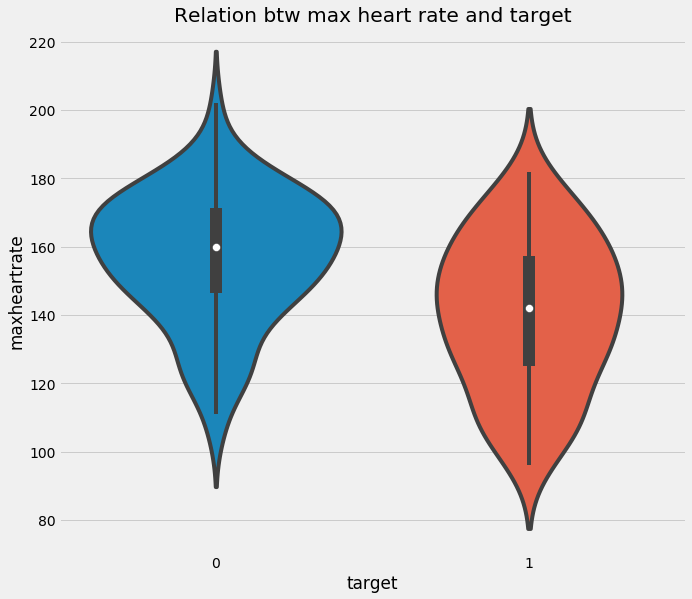

In [44]:
sns.violinplot(df['target'], df['maxheartrate'])
plt.title('Relation btw max heart rate and target')
plt.show()

It is evident from the above bivariant plot that the max heart rate of individuals with heart disease are significantly lower than the ones without heart disease. Hence heart rate is negatively correlated with the target variable i.e. heart disease. 

### Correlation 

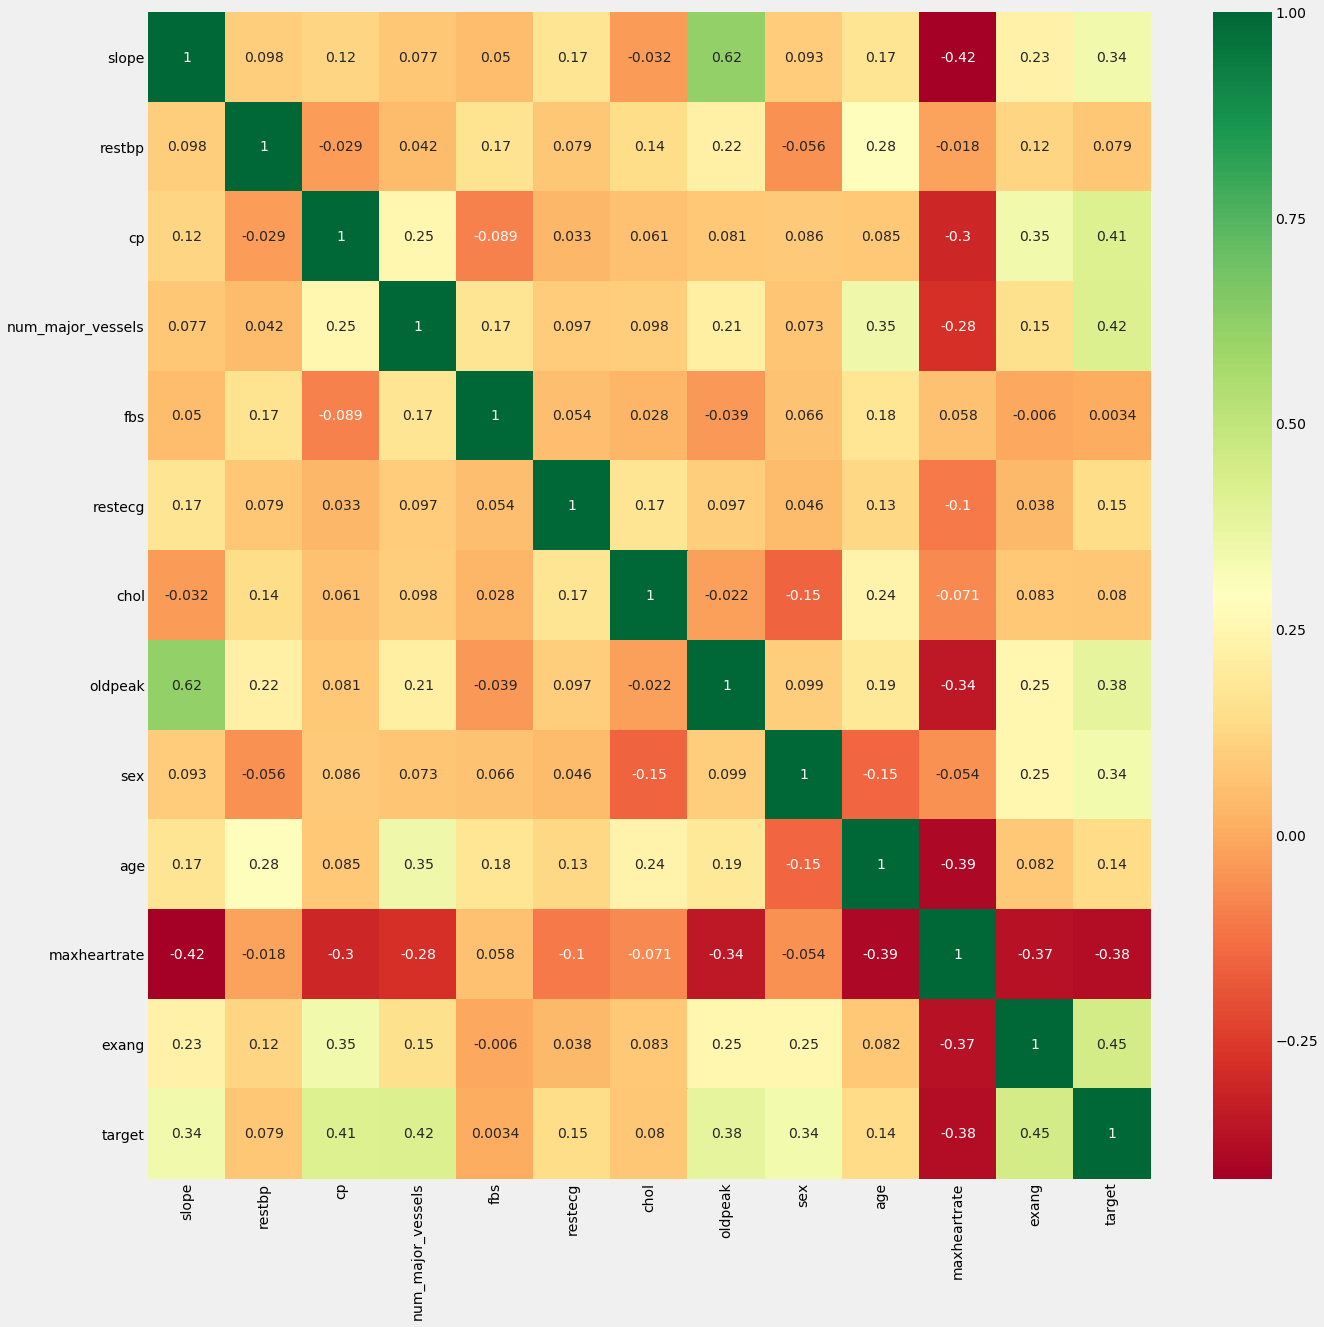

In [45]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot = True, cmap = "RdYlGn")

In [46]:
df = pd.get_dummies(df, columns = ['sex','cp','restecg','exang','slope','thal','num_major_vessels','fbs'])

In [47]:
df = df.drop(columns=(['patient_id']))

In [48]:
df = df.drop(columns=(['maxheartrate']))

### StandardScaler

In [49]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age','restbp','chol','oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [50]:
df.head(20)

,restbp,chol,oldpeak,age,target,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_3,thal_fixed_defect,thal_normal,thal_reversible_defect,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,fbs_0,fbs_1
0,-0.195195,1.118269,-0.903207,-1.053964,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
1,-1.256320,-0.669778,0.527616,-0.087134,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,-0.372049,1.042182,-0.903207,2.383654,1,0,1,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,1.219639,-0.498582,-0.903207,-1.591092,1,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
4,2.752375,0.395442,2.852703,0.449994,0,0,1,1,0,0,...,1,0,0,1,1,0,0,0,1,0
5,-0.077292,-1.316518,-0.903207,-1.376241,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,1,0
6,1.101736,0.167180,1.421880,0.557419,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
7,1.101736,0.509572,-0.366648,0.235143,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
8,2.280764,1.460661,2.137292,0.449994,1,0,1,0,0,0,...,1,0,0,1,1,0,0,0,1,0
9,-0.666806,-0.574669,0.527616,-0.516836,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [51]:
y = df['target']
X = df.drop(['target'], axis = 1)

In [52]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 10, shuffle=True)


### K-Nearest Neighbour: 

In [53]:
from sklearn import neighbors 
clf = neighbors.KNeighborsClassifier(n_neighbors=7, p=1)
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')

In [54]:
accuracy = clf.score(X_test,y_test)
accuracy

0.9259259259259259

In [55]:
k_range = range(1,26)
scores={}

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    predict_knn = knn.predict(X_test)
    scores[k]=accuracy_score(y_test,predict_knn)
scores

{1: 0.7407407407407407,
 2: 0.8148148148148148,
 3: 0.8518518518518519,
 4: 0.8333333333333334,
 5: 0.8518518518518519,
 6: 0.8333333333333334,
 7: 0.8888888888888888,
 8: 0.8703703703703703,
 9: 0.8703703703703703,
 10: 0.8888888888888888,
 11: 0.8703703703703703,
 12: 0.8703703703703703,
 13: 0.8703703703703703,
 14: 0.8703703703703703,
 15: 0.8703703703703703,
 16: 0.8703703703703703,
 17: 0.8703703703703703,
 18: 0.8888888888888888,
 19: 0.8888888888888888,
 20: 0.8888888888888888,
 21: 0.8888888888888888,
 22: 0.9074074074074074,
 23: 0.8888888888888888,
 24: 0.8888888888888888,
 25: 0.8888888888888888}

### XGboost: 

In [56]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test)
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.8148148148148148
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.81      0.74      0.77        23

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



### Random Forest 

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=3)
classifier.fit(X_train, y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
# Predicting the Test set results
y_pred_rf = classifier.predict(X_test)

print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.7962962962962963
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        31
           1       0.77      0.74      0.76        23

    accuracy                           0.80        54
   macro avg       0.79      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



### Decision Tree 

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3,min_samples_split=3,max_features=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [61]:
y_pred_df = dt.predict(X_test)

print(accuracy_score(y_test, y_pred_df))

0.8333333333333334


In [62]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [63]:
y_pred_svm = svm.predict(X_test)

print(accuracy_score(y_test, y_pred_svm))

0.8518518518518519
